Before we start looking at the coverage, we want to first import the necessary modules. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from itertools import islice 
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix, andrews_curves

Next, we want to define a function that joins the directories of the desired path in hopes of simplifying the process of reading the .tsv files. In this function, we want to make sure the inputted file is a string. 

In [2]:
def join_file(file): 
    dir = r'~/Coverage/data/12_SUMMARY/bin_by_bin/ALL_SPLITS'
    if isinstance(file, str) is False:
        raise Exception('The type of your file is a {} and needs to be a string :/'.format(type(file)))
    return os.path.join(dir, file)

Now we load up and read the .tsv files, as well as exporting them to a .csv file. 

In [3]:
# The coverage values for each metagenome with specific genes
df = pd.read_csv(join_file('ALL_SPLITS-gene_non_outlier_coverages.txt'), 
                 sep = '\t').set_index('gene_callers_id')

# The standard deviation coverage values 
df_sigma = pd.read_csv(join_file('ALL_SPLITS-gene_non_outlier_coverage_stds.txt'), 
                        sep = '\t').set_index('gene_callers_id')


data_dir = r'../data/' # Sets a new directory for where our data should be
df.to_csv(data_dir + 'Coverage.csv')
df_sigma.to_csv(data_dir +'Coverage_sigma.csv')

We want to see what columns we are working with, so we print the first 5 rows of our dataframe. We also want a basic summary of the basic statistical values.

In [4]:
df.head()

,ANE_004_05M,ANE_004_40M,ANE_150_05M,ANE_150_40M,ANE_151_05M,ANE_151_80M,ANE_152_05M,ANW_141_05M,ANW_142_05M,ANW_145_05M,...,PSW_128_40M,RED_31_05M,RED_32_05M,RED_32_80M,RED_33_05M,RED_34_05M,RED_34_60M,SOC_84_05M,SOC_85_05M,SOC_85_90M
gene_callers_id,,,,,,,,,,,,,,,,,,,,,
1230,0.000000,0.000000,0.701389,0.000000,2.955056,1.082962,0.000000,2.044402,1.196158,0.000000,...,0.959543,0.920139,3.242754,0.000000,1.801282,7.103571,0.885068,0.000000,0.000000,0.000000
1231,0.000000,0.779553,1.075638,1.009675,0.640091,0.000000,0.000000,0.894249,1.137011,0.745358,...,0.000000,0.985728,0.502580,0.631198,0.895377,3.016057,1.743184,0.000000,0.000000,0.000000
1232,2.308204,8.848606,0.800000,2.940000,4.534161,4.615087,3.880342,4.780449,0.566667,1.901376,...,3.362563,2.746753,5.094574,0.656842,6.289425,6.549606,0.717694,1.008104,1.869355,1.077206
1233,0.000000,0.000000,1.673582,1.717138,5.044211,1.370543,1.016949,1.592806,1.721739,0.838174,...,1.092669,0.920128,2.012346,0.000000,3.829588,4.966741,0.000000,0.000000,0.000000,0.000000
1234,0.370583,1.080229,1.181025,1.667647,2.080544,2.748344,0.713467,2.011351,3.738072,0.000000,...,1.802871,1.115991,1.375427,0.000000,9.217054,7.203260,0.000000,0.000000,0.086915,0.203438


In [5]:
df.describe()

,ANE_004_05M,ANE_004_40M,ANE_150_05M,ANE_150_40M,ANE_151_05M,ANE_151_80M,ANE_152_05M,ANW_141_05M,ANW_142_05M,ANW_145_05M,...,PSW_128_40M,RED_31_05M,RED_32_05M,RED_32_80M,RED_33_05M,RED_34_05M,RED_34_60M,SOC_84_05M,SOC_85_05M,SOC_85_90M
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,...,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,172.817982,299.608349,321.301558,275.781062,308.886857,216.603589,66.355116,572.462331,290.120408,228.006186,...,219.122153,466.189768,505.800545,248.588116,723.774598,638.401231,99.863169,1.103168,1.295401,1.196534
std,154.800781,235.618106,244.113452,212.290976,239.216560,168.868690,72.272410,375.789115,233.248835,160.110231,...,244.194078,361.228508,377.690965,193.867680,502.582064,433.403013,75.818548,8.583339,8.857377,8.053501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.114968,54.623854,61.933014,49.221619,58.852271,40.301266,15.705094,167.960504,34.249639,64.697330,...,12.027030,70.202304,86.746732,32.206848,168.894631,158.107415,16.531513,0.000000,0.000000,0.000000
50%,172.952461,305.426285,333.545054,280.840187,311.853661,219.560387,53.983524,681.784998,291.791218,249.307854,...,117.841391,490.641618,564.819490,263.568268,843.046406,755.055252,104.968085,0.000000,0.000000,0.000000
75%,260.667045,469.651054,507.411206,436.256089,483.108702,338.482581,91.291407,880.165387,484.011622,353.933527,...,371.736583,765.930510,845.990101,408.179149,1149.984970,1009.565833,162.233696,0.546757,0.619354,0.687012
max,2300.918919,1355.894118,1337.613333,1178.283333,1592.222222,1078.027778,804.506667,1290.526480,855.790896,857.325301,...,1054.708767,1511.473118,1217.336538,688.960976,1690.004000,1466.757202,281.294118,305.910053,308.513196,279.843305


The same logic is applied to the standard deviation coverage values

In [6]:
df_sigma.head()

,ANE_004_05M,ANE_004_40M,ANE_150_05M,ANE_150_40M,ANE_151_05M,ANE_151_80M,ANE_152_05M,ANW_141_05M,ANW_142_05M,ANW_145_05M,...,PSW_128_40M,RED_31_05M,RED_32_05M,RED_32_80M,RED_33_05M,RED_34_05M,RED_34_60M,SOC_84_05M,SOC_85_05M,SOC_85_90M
gene_callers_id,,,,,,,,,,,,,,,,,,,,,
1230,0.000000,0.000000,0.721253,0.000000,1.155447,1.070772,0.000000,1.307078,1.116991,0.000000,...,0.789185,1.077167,2.026755,0.00000,0.959566,1.298346,0.971263,0.000000,0.000000,0.000000
1231,0.000000,1.033706,1.632857,1.407635,0.909497,0.000000,0.000000,0.811527,1.065848,0.759649,...,0.000000,1.144542,0.642688,0.84632,1.154175,2.702909,1.713162,0.000000,0.000000,0.000000
1232,4.528344,7.415190,1.292512,3.206930,4.631825,5.682169,3.922132,3.784440,0.775314,1.938717,...,2.257851,1.992068,4.024967,0.84488,2.544174,2.909985,1.034122,1.023991,1.681214,0.912291
1233,0.000000,0.000000,1.376027,1.012331,1.112675,1.068535,0.935034,1.281728,0.915704,0.872245,...,0.941432,0.950875,1.102677,0.00000,1.261273,1.178617,0.000000,0.000000,0.000000,0.000000
1234,1.070671,1.346140,1.063907,1.271996,1.897697,1.197229,1.143079,1.128461,2.173699,0.000000,...,1.108208,1.012897,0.985740,0.00000,2.098213,3.173915,0.000000,0.000000,0.301367,0.742789


In [7]:
df_sigma.describe()

,ANE_004_05M,ANE_004_40M,ANE_150_05M,ANE_150_40M,ANE_151_05M,ANE_151_80M,ANE_152_05M,ANW_141_05M,ANW_142_05M,ANW_145_05M,...,PSW_128_40M,RED_31_05M,RED_32_05M,RED_32_80M,RED_33_05M,RED_34_05M,RED_34_60M,SOC_84_05M,SOC_85_05M,SOC_85_90M
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,...,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,39.038340,59.241591,57.084594,47.794651,57.749177,42.530901,22.053108,68.242723,49.498944,35.727333,...,47.610295,69.195827,68.153178,40.393658,83.733160,74.113797,17.808854,1.456135,1.685583,1.580930
std,47.939791,54.767987,51.821394,44.160372,54.309530,39.572915,28.652507,59.733582,44.395447,31.658604,...,51.345438,61.335578,63.168394,35.491110,75.346165,65.319855,15.326817,9.921148,10.040211,10.643565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.598841,18.052542,17.340911,14.201948,17.588154,13.507111,5.844172,25.933356,11.327739,14.033472,...,5.611061,16.848131,18.132485,11.034903,26.539442,23.521712,5.491698,0.000000,0.000000,0.000000
50%,28.822122,49.254806,48.605339,39.575698,47.751805,35.425702,15.121102,55.181912,41.231201,29.423429,...,33.473685,59.120863,55.029042,34.827187,69.758874,62.221538,15.689128,0.000000,0.000000,0.000000
75%,52.056984,83.406521,83.349484,68.880770,82.554984,61.074302,28.653265,96.089626,71.493395,50.444486,...,71.061427,104.886325,98.808691,58.766579,119.525505,103.623128,25.622690,0.856785,0.906532,0.959329
max,710.677520,575.668786,594.067943,506.453967,632.177044,503.727956,441.194259,442.848919,278.286786,444.704508,...,445.336367,363.562762,424.735719,229.567542,488.720994,375.455102,136.135438,316.719406,334.981276,302.703189


We ideally want to get a good count of the number of genes in each metagenome, so we use the count function as shown below. Since df_sigma has the same number of entries, counting its values would be redundant and is therefore omitted in this notebook.

In [8]:
df.count()

ANE_004_05M    1472
ANE_004_40M    1472
ANE_150_05M    1472
ANE_150_40M    1472
ANE_151_05M    1472
               ... 
RED_34_05M     1472
RED_34_60M     1472
SOC_84_05M     1472
SOC_85_05M     1472
SOC_85_90M     1472
Length: 93, dtype: int64

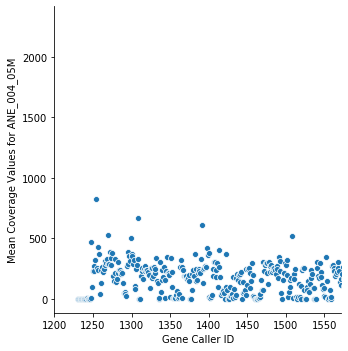

In [9]:
df_reset = df.reset_index()
columns = df_reset.columns
rows = df.iloc
count = df.count()
plot = sns.relplot("gene_callers_id", "ANE_004_05M", data=df_reset)
k = plot.set(xlim=(1200, count[0] + 100)).set_axis_labels("Gene Caller ID", "Mean Coverage Values for ANE_004_05M")


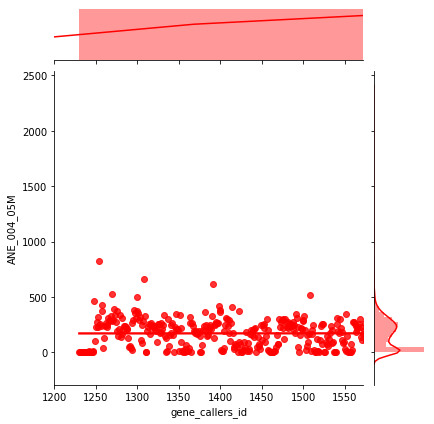

In [10]:
new_plot = sns.jointplot(data=df_reset, x="gene_callers_id", y="ANE_004_05M", kind = 'reg', xlim = (1200, count[0] + 100), color = "r")


In [ ]:
p = sns.PairGrid(data=df_reset)

Now, we want to see how we can find the absent genes within each metagenome of a dataframe, as well as count the total number of said genes. I will define an absent gene to be a gene that has low mean coverage values with the metagenome. A major issue with this definition is the criteria for "low mean coverage values," so this function will allow the user to determine these values.

In [3]:
def absent_genes(file, criteria):
    if isinstance(criteria, int) is not True:
        raise Exception('Criteria must be an integer and you inputted a {}'.format(type(criteria)))
    return file[file.le(criteria)]

def number_of_absent_genes(file, criteria):
    return absent_genes(file, criteria).count()

In [4]:
print(absent_genes(df, 2))


NameError: name 'df' is not defined

In [5]:
def split_metagenome_values(file, desired_column):# Splits metagenomes in each environment and returns the coverage values. 
                                                  # Columns are indexed from 1, ..., N
    columns = []
    fixed_file = file.reset_index(drop=True)
    
    for column in fixed_file.columns:
        separate_column = file['{}'.format(column)]
        columns.append(separate_column)
    
    columns = np.array_split(columns, len(columns))
    
    desired = int(desired_column)
    length = len(columns)
    
    if desired > length:
        raise Exception("Error! You inputted {} but the maximum number of columns available are {}"
                        .format(desired, length))
        
    return columns[(desired - 1)] 

In [6]:
print(split_metagenome_values(df, 1))

NameError: name 'df' is not defined

In [7]:
def rearrange_columns(file):
    
     
    values = {}
    fixed_file = file.reset_index(drop=True)
    column_values = split_column_values(file)
    
    
    for column in fixed_file.columns:
        values['{}'.format(column)] = split_column_values[fixed_file.index(column)]
        print(column)

In [8]:
def number_of_absent_genes(file): # Returns the number of absent genes in each environment
    return file[file.le(100)].count()

            
def total_number_of_absent_genes(file):
    count = 0
    length = len(absent_genes(file))
    return "The number of absent genes in this metagenome is {}".format(length)

print(number_of_absent_genes(df))

NameError: name 'df' is not defined

In [9]:
def separate_metagenomes(file):
    metagenomes = {}
    file_columns = file.reset_index(drop = True)
    for i in file_columns.columns:
        i = metagenomes[file['{}'.format(i)]]
    return metagenomes
    
print(separate_metagenomes(df))

NameError: name 'df' is not defined

In [10]:
df = df.reset_index(drop = True)
df

NameError: name 'df' is not defined

In [11]:
print(compressWord('Hello', 2))


NameError: name 'compressWord' is not defined